In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/home/yqw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.8.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

In [3]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

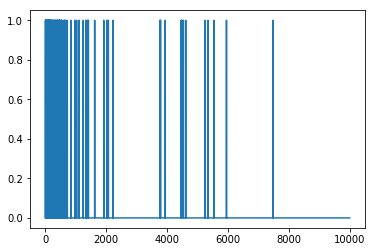

In [4]:
plt.plot(train_data[0])

In [5]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.4699 - acc: 0.8152 - binary_crossentropy: 0.4699 - val_loss: 0.3256 - val_acc: 0.8763 - val_binary_crossentropy: 0.3256
Epoch 2/20
 - 2s - loss: 0.2397 - acc: 0.9127 - binary_crossentropy: 0.2397 - val_loss: 0.2848 - val_acc: 0.8866 - val_binary_crossentropy: 0.2848
Epoch 3/20
 - 1s - loss: 0.1765 - acc: 0.9383 - binary_crossentropy: 0.1765 - val_loss: 0.2940 - val_acc: 0.8837 - val_binary_crossentropy: 0.2940
Epoch 4/20
 - 1s - loss: 0.1406 - acc: 0.9516 - binary_crossentropy: 0.1406 - val_loss: 0.3231 - val_acc: 0.8772 - val_binary_crossentropy: 0.3231
Epoch 5/20
 - 1s - loss: 0.1166 - acc: 0.9614 - binary_crossentropy: 0.1166 - val_loss: 0.3521 - val_acc: 0.8712 - val_binary_crossentropy: 0.3521
Epoch 6/20
 - 1s - loss: 0.0960 - acc: 0.9703 - binary_crossentropy: 0.0960 - val_loss: 0.3862 - val_acc: 0.8680 - val_binary_crossentropy: 0.3862
Epoch 7/20
 - 1s - loss: 0.0794 - acc: 0.9771 - binary_crossentropy:

In [7]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [8]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.3628 - acc: 0.8330 - binary_crossentropy: 0.3628 - val_loss: 0.3025 - val_acc: 0.8782 - val_binary_crossentropy: 0.3025
Epoch 2/20
 - 5s - loss: 0.1545 - acc: 0.9430 - binary_crossentropy: 0.1545 - val_loss: 0.3236 - val_acc: 0.8755 - val_binary_crossentropy: 0.3236
Epoch 3/20
 - 5s - loss: 0.0600 - acc: 0.9812 - binary_crossentropy: 0.0600 - val_loss: 0.4269 - val_acc: 0.8660 - val_binary_crossentropy: 0.4269
Epoch 4/20
 - 5s - loss: 0.0117 - acc: 0.9975 - binary_crossentropy: 0.0117 - val_loss: 0.6130 - val_acc: 0.8574 - val_binary_crossentropy: 0.6130
Epoch 5/20
 - 5s - loss: 0.0026 - acc: 0.9998 - binary_crossentropy: 0.0026 - val_loss: 0.6422 - val_acc: 0.8696 - val_binary_crossentropy: 0.6422
Epoch 6/20
 - 5s - loss: 9.2411e-04 - acc: 1.0000 - binary_crossentropy: 9.2411e-04 - val_loss: 0.6844 - val_acc: 0.8700 - val_binary_crossentropy: 0.6844
Epoch 7/20
 - 5s - loss: 2.4826e-04 - acc: 1.0000 - binary_c

In [9]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [10]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.6385 - acc: 0.6164 - binary_crossentropy: 0.6385 - val_loss: 0.5848 - val_acc: 0.6848 - val_binary_crossentropy: 0.5848
Epoch 2/20
 - 2s - loss: 0.5295 - acc: 0.7569 - binary_crossentropy: 0.5295 - val_loss: 0.5108 - val_acc: 0.7771 - val_binary_crossentropy: 0.5108
Epoch 3/20
 - 2s - loss: 0.4619 - acc: 0.8558 - binary_crossentropy: 0.4619 - val_loss: 0.4783 - val_acc: 0.8299 - val_binary_crossentropy: 0.4783
Epoch 4/20
 - 2s - loss: 0.4190 - acc: 0.9034 - binary_crossentropy: 0.4190 - val_loss: 0.4615 - val_acc: 0.8428 - val_binary_crossentropy: 0.4615
Epoch 5/20
 - 2s - loss: 0.3872 - acc: 0.9257 - binary_crossentropy: 0.3872 - val_loss: 0.4422 - val_acc: 0.8671 - val_binary_crossentropy: 0.4422
Epoch 6/20
 - 2s - loss: 0.3609 - acc: 0.9426 - binary_crossentropy: 0.3609 - val_loss: 0.4371 - val_acc: 0.8646 - val_binary_crossentropy: 0.4371
Epoch 7/20
 - 2s - loss: 0.3379 - acc: 0.9514 - binary_crossentropy:

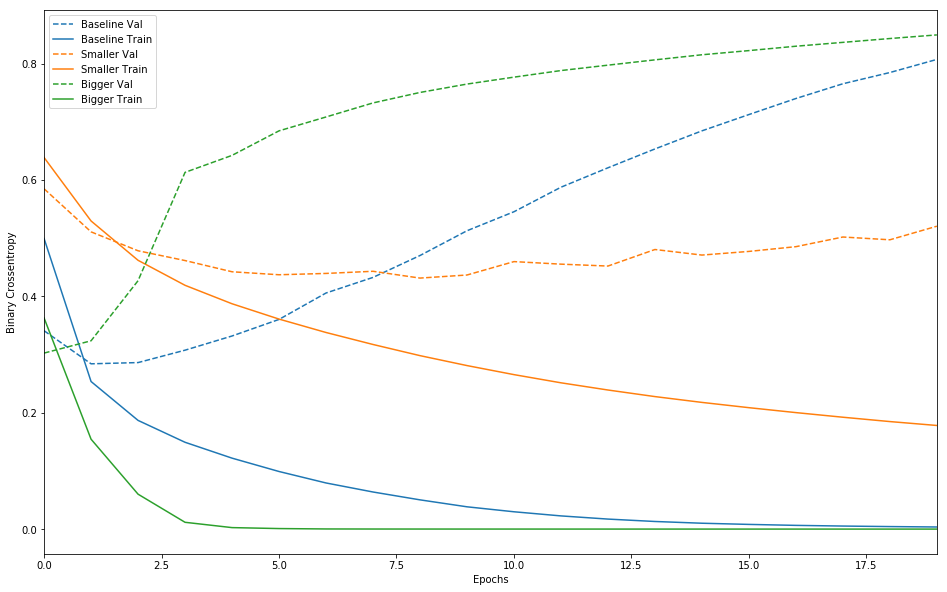

In [12]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.5051 - acc: 0.8176 - binary_crossentropy: 0.4633 - val_loss: 0.3749 - val_acc: 0.8786 - val_binary_crossentropy: 0.3303
Epoch 2/20
 - 2s - loss: 0.3030 - acc: 0.9093 - binary_crossentropy: 0.2545 - val_loss: 0.3364 - val_acc: 0.8875 - val_binary_crossentropy: 0.2852
Epoch 3/20
 - 2s - loss: 0.2558 - acc: 0.9282 - binary_crossentropy: 0.2023 - val_loss: 0.3398 - val_acc: 0.8855 - val_binary_crossentropy: 0.2845
Epoch 4/20
 - 2s - loss: 0.2310 - acc: 0.9393 - binary_crossentropy: 0.1741 - val_loss: 0.3540 - val_acc: 0.8823 - val_binary_crossentropy: 0.2960
Epoch 5/20
 - 2s - loss: 0.2186 - acc: 0.9453 - binary_crossentropy: 0.1589 - val_loss: 0.3660 - val_acc: 0.8793 - val_binary_crossentropy: 0.3052
Epoch 6/20
 - 2s - loss: 0.2058 - acc: 0.9506 - binary_crossentropy: 0.1443 - val_loss: 0.3818 - val_acc: 0.8759 - val_binary_crossentropy: 0.3200
Epoch 7/20
 - 2s - loss: 0.1993 - acc: 0.9533 - binary_crossentropy:

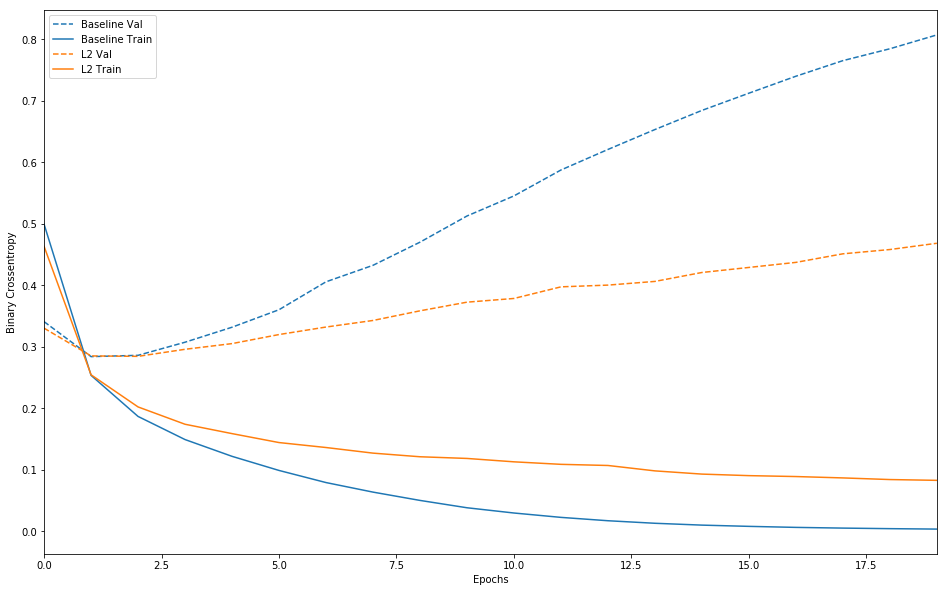

In [14]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.6217 - acc: 0.6536 - binary_crossentropy: 0.6217 - val_loss: 0.5072 - val_acc: 0.8536 - val_binary_crossentropy: 0.5072
Epoch 2/20
 - 2s - loss: 0.4789 - acc: 0.8054 - binary_crossentropy: 0.4789 - val_loss: 0.3806 - val_acc: 0.8806 - val_binary_crossentropy: 0.3806
Epoch 3/20
 - 2s - loss: 0.3820 - acc: 0.8606 - binary_crossentropy: 0.3820 - val_loss: 0.3115 - val_acc: 0.8868 - val_binary_crossentropy: 0.3115
Epoch 4/20
 - 2s - loss: 0.3191 - acc: 0.8892 - binary_crossentropy: 0.3191 - val_loss: 0.2857 - val_acc: 0.8866 - val_binary_crossentropy: 0.2857
Epoch 5/20
 - 2s - loss: 0.2758 - acc: 0.9034 - binary_crossentropy: 0.2758 - val_loss: 0.2788 - val_acc: 0.8879 - val_binary_crossentropy: 0.2788
Epoch 6/20
 - 2s - loss: 0.2416 - acc: 0.9183 - binary_crossentropy: 0.2416 - val_loss: 0.2860 - val_acc: 0.8867 - val_binary_crossentropy: 0.2860
Epoch 7/20
 - 2s - loss: 0.2162 - acc: 0.9249 - binary_crossentropy:

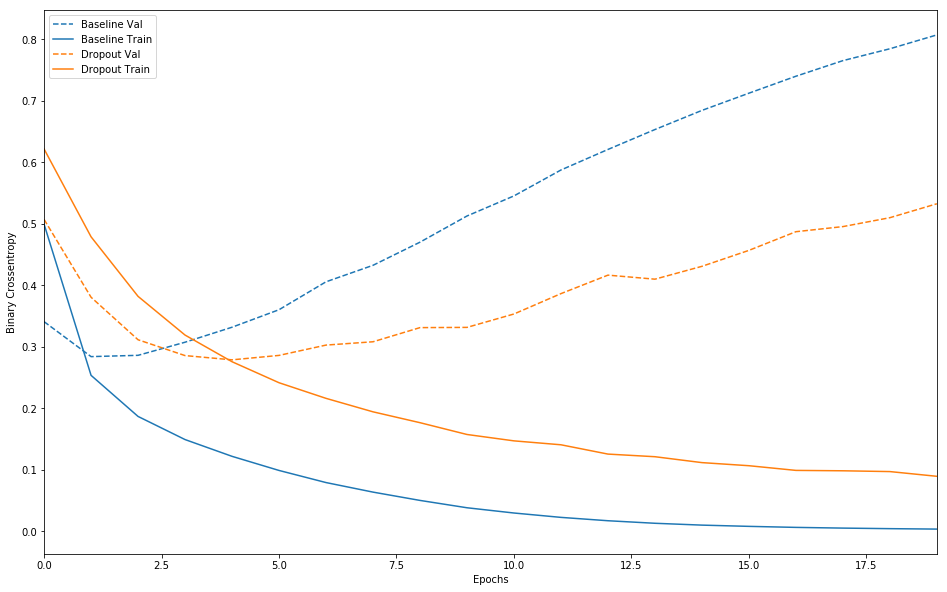

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])
